In [12]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shapely

In [35]:
tpa = gpd.read_file('../data/sampling_locations/tpa_points.geojson')
tpa.head()

,id,From Kab,From_#KEC,ID,Kab,Kecamatan,Name,Surface_Ha,TOT_Kg/Day,geometry
0,00000000000000000004,NaN,NaN,5,Klungkung,Nusa Penida,TPA Jungut Batu,1.20,NaN,POINT (115.45941 -8.67096)
1,00000000000000000005,1.0,1.0,6,Klungkung,Nusa Penida,TPA Biaung,1.85,9433.0,POINT (115.49802 -8.67993)
2,00000000000000000003,1.0,3.0,4,Klungkung,Dawan,TPA Sente,1.00,43219.0,POINT (115.45446 -8.53037)
3,00000000000000000006,1.0,4.0,7,Bangli,Bangli,TPA Regional Bangli,0.99,47350.0,POINT (115.36793 -8.35354)
4,00000000000000000008,1.0,5.0,9,Jembrana,Negara,TPA Peh,2.00,38130.0,POINT (114.58329 -8.32794)


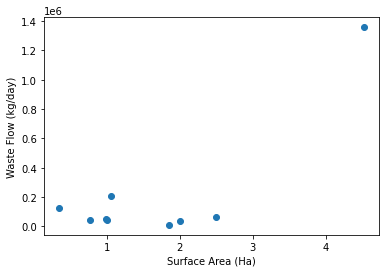

In [39]:
plt.scatter(tpa['Surface_Ha'], tpa['TOT_Kg/Day'])
plt.xlabel('Surface Area (Ha)')
plt.ylabel('Waste Flow (kg/day)')
plt.show()

In [6]:
contours = gpd.read_file('../data/model_outputs/site_contours/v2.1/indonesia_v0_mask_window_8_upsampled_4_contours_model_v0.0.11_ensemble-8-25-21.geojson')

In [11]:
index = []
for elem in contours['name']:
    if 'bali' in elem:
        index.append(True)
    else:
        index.append(False)
bali = contours[index]

In [31]:
a.within()

,name,date,area (km^2),geometry
3816,bali_v0.0.7_2019-01-01_2021-06-01mosaic-median_1,2016-12-01T00:00:00,0.000000,None
3817,bali_v0.0.7_2019-01-01_2021-06-01mosaic-median_1,2017-03-01T00:00:00,0.001076,"MULTIPOLYGON (((114.58369 -8.32736, 114.58359 ..."
3818,bali_v0.0.7_2019-01-01_2021-06-01mosaic-median_1,2017-06-01T00:00:00,0.000000,None
3819,bali_v0.0.7_2019-01-01_2021-06-01mosaic-median_1,2017-12-01T00:00:00,0.000000,None
3820,bali_v0.0.7_2019-01-01_2021-06-01mosaic-median_1,2018-03-01T00:00:00,0.000000,None


In [65]:
site_info = {}
for tpa_index in range(len(tpa)):
    tpa_row = tpa.iloc[tpa_index]
    tpa_name = tpa_row['Name']
    tpa_volume = tpa_row['TOT_Kg/Day']
    tpa_area = tpa_row['Surface_Ha']
    tpa_location = tpa_row['geometry']
    site_info[tpa_name] = {
        'volume': tpa_volume,
        'area': tpa_area,
        'contour_areas': []
    }
    for idx in range(len(bali)): 
        row = bali.iloc[idx]
        contour = row['geometry']
        area = row['area (km^2)']
        if contour != None:
            display(contour.buffer(0.002).area)
            if contour.buffer(0.002).contains(tpa_location):
                site_info[tpa_name]['contour_areas'].append(area)

In [73]:
contour.buffer(0.002).area

1.4836260298342139e-05

In [70]:
for site in site_info:
    print(site, site_info[site]['contour_areas'])
    print(site, np.mean(site_info[site]['contour_areas']))

TPA Jungut Batu [0.00507041151491781, 0.007152729104620065, 0.008287367830792137, 0.005927837077229959, 0.0077748487117872845, 0.0013860635103113733]
TPA Jungut Batu 0.005933209624943105
TPA Biaung [0.017452789496286262, 0.009295266153621867, 0.009330720683809161, 0.006736167350536228, 0.00750002940444229, 0.00848950513430433, 0.008766687104779805, 0.012476412436908986, 0.01199940181521849, 0.01180601924726822, 0.01220567677493906, 0.012034855419062353, 0.012882516949871388, 0.01186725729063375]
TPA Biaung 0.010917378947263015
TPA Sente []
TPA Sente nan
TPA Regional Bangli [0.0012551505524068648, 0.0026486919358798128, 0.007350679414943383, 0.0018891644475783533, 0.0018891644475783533, 0.0033470685855543835, 0.00567070489048847, 0.009867415281625408, 0.006851834922581601, 0.00568035995268577, 0.0016220416828548953]
TPA Regional Bangli 0.004370206919470663
TPA Peh [0.0010755124077217399, 0.0012245289187785523]
TPA Peh 0.001150020663250146
TPA Temesi [0.009674730111218683, 0.001140856276

/Users/ckruse/.pyenv/versions/3.7.9/envs/venv-plastics/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ckruse/.pyenv/versions/3.7.9/envs/venv-plastics/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


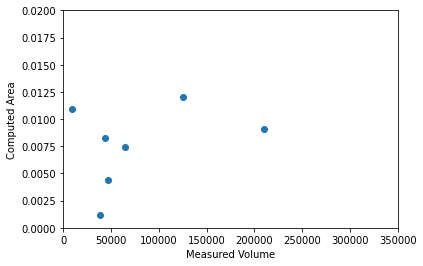

In [66]:
x = [site_info[site]['volume'] for site in site_info]
y = [np.mean(site_info[site]['contour_areas']) for site in site_info]
plt.scatter(x,y)
plt.xlabel('Measured Volume')
plt.ylabel('Computed Area')
plt.xlim([0, 350000])
plt.ylim([0, 0.02])
plt.show()

In [58]:
for name, mass in zip(tpa['Name'], tpa['TOT_Kg/Day']):
    print(f'{name}: {mass:,.0f}')

TPA Jungut Batu: nan
TPA Biaung: 9,433
TPA Sente: 43,219
TPA Regional Bangli: 47,350
TPA Peh: 38,130
TPA Temesi: 209,560
TPA Bengkala: 125,350
TPA Bebandem: 43,860
TPA Mandung: 64,580
TPA Regional Suwung: 1,358,533
